In [1]:
import pandas as pd
import numpy as np

# **DATASET**

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

# **DATA EXPLORATION**

In [4]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [5]:
wine.target[0]

0

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
len(wine.feature_names)

13

In [8]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
target = pd.DataFrame(wine.target, columns = ['category'])
target.head()

,category
0,0
1,0
2,0
3,0
4,0


In [10]:
df.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

# **DATA VISUALIZATION**

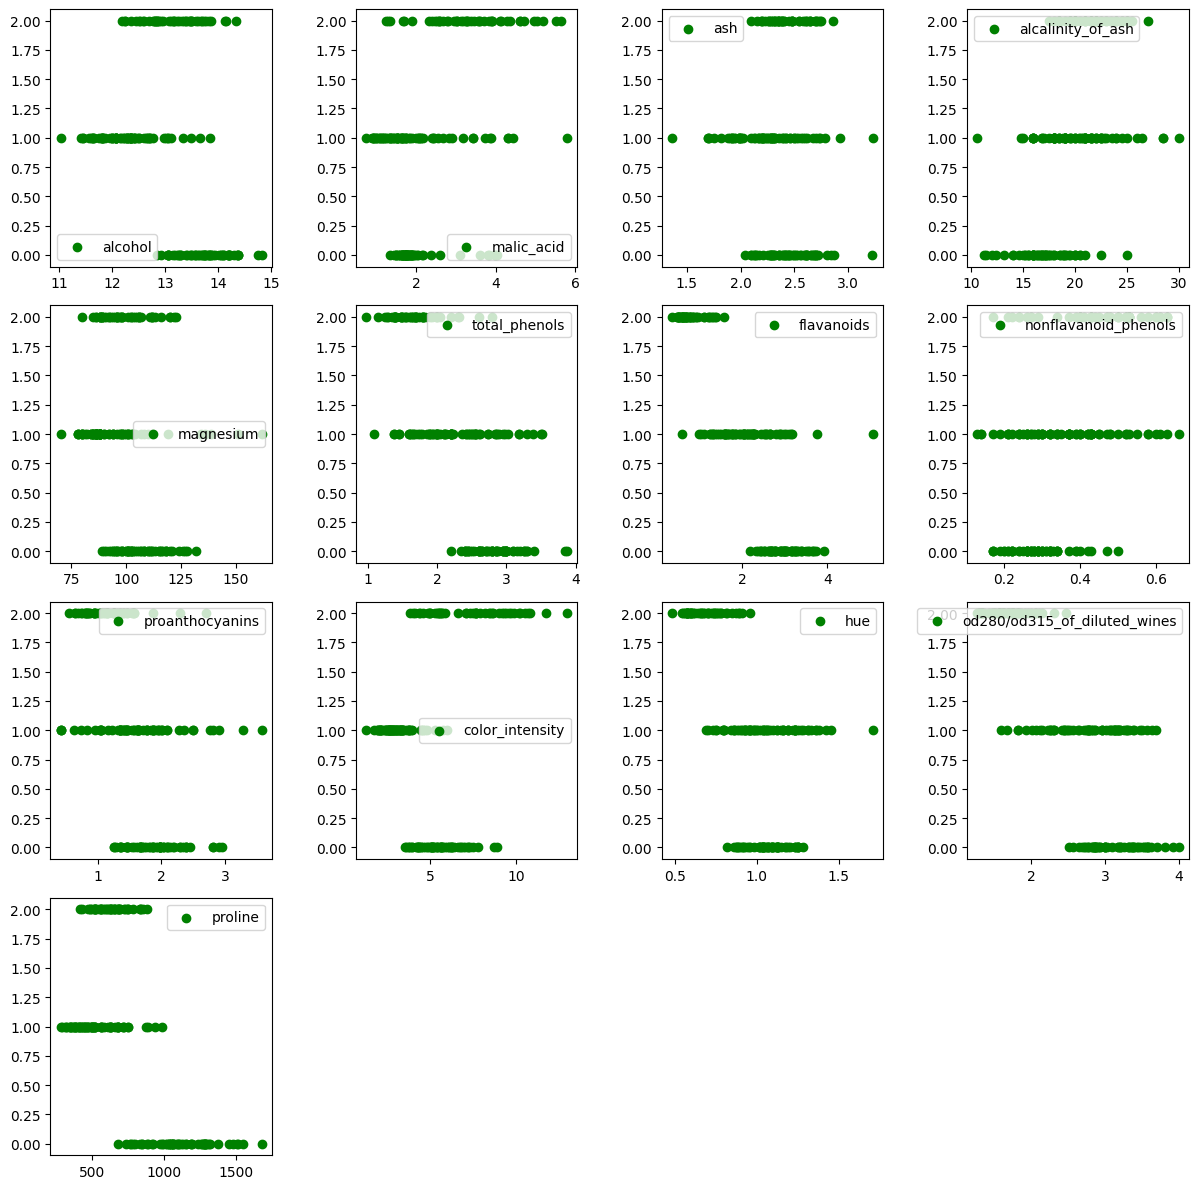

In [11]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize=(12,12))
fig.delaxes(axes[3,1])
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,3])
axes = axes.flatten()
columns = df.columns



for (i, ax) in enumerate(axes[:-3]):

  ax.scatter(df[columns[i]], target.category, color='green', label = columns[i])
  ax.legend()


plt.tight_layout()
plt.show()


# **SPLIT**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(df, target, test_size=0.2)

# **GAUSSIAN NAIVE BAYES**

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [15]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# **MULTINOMAL NAIVE BAYES**

In [27]:
from sklearn.naive_bayes import MultinomialNB

model_MNB = MultinomialNB()

In [28]:
model_MNB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

# **MODEL EVALUATION**

In [31]:
print("Model score with Gaussian Naive Bayes: ",model.score(X_test, y_test))

Model score with Gaussian Naive Bayes:  0.9722222222222222


In [30]:
print("Model score with Multinomial Naive Bayes: ",model_MNB.score(X_test, y_test))

Model score with Multinomial Naive Bayes:  0.8055555555555556


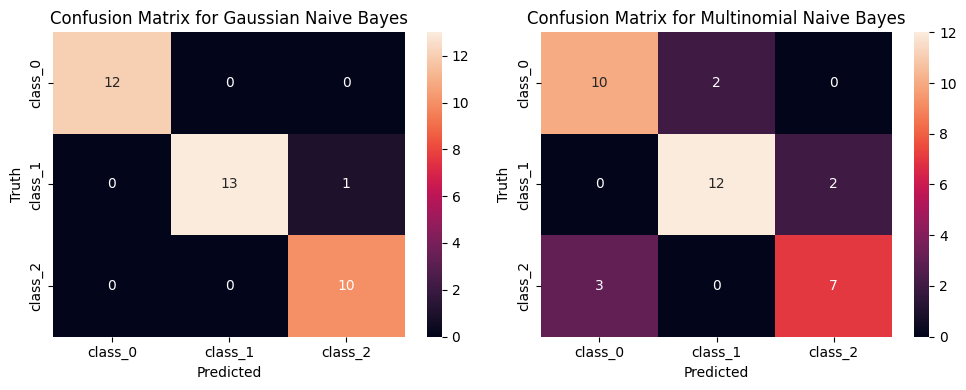

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_predicted_g = model.predict(X_test)
y_predicted_mnb = model_MNB.predict(X_test)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# axes = axes.flatten()


cm = confusion_matrix(y_test, y_predicted_g)
sn.heatmap(cm, annot=True, xticklabels=wine.target_names, yticklabels = wine.target_names, ax=axes[0])
axes[0].set_title("Confusion Matrix for Gaussian Naive Bayes")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Truth')


cm2 = confusion_matrix(y_test, y_predicted_mnb)
sn.heatmap(cm2, annot=True, xticklabels=wine.target_names, yticklabels = wine.target_names, ax=axes[1])
axes[1].set_title("Confusion Matrix for Multinomial Naive Bayes")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Truth')

plt.tight_layout()
plt.show()